In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Importowanie danych z arkuszy train.csv i test.csv

In [4]:
training = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])

%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

W pierwszej kolejności chcemy dowiedzieć się podstawowych informacji wynikających z materiałów treningowych.

In [6]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
# określamy rodzaje zmiennych znajdujących się w dataset
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [8]:
# dzielimy poszcególne dane na kategorie zawierajace zmienne numeryczne oraz zmienne typu kategoria
dane_num = training[['Age','SibSp','Parch','Fare']]
dane_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


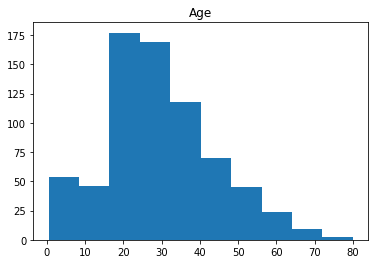

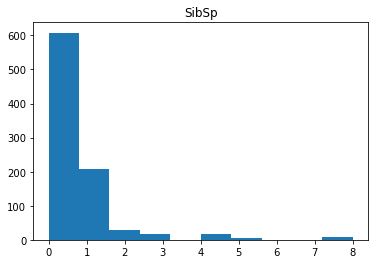

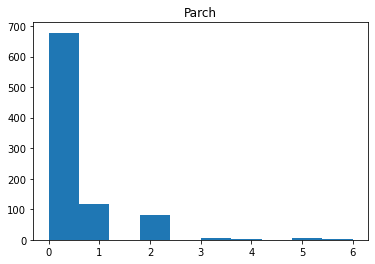

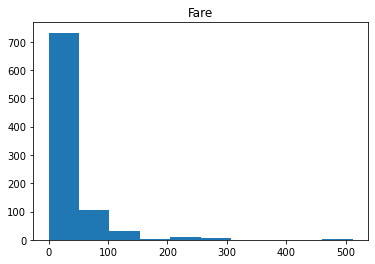

In [11]:
# Następnie prezentujemy dane w postaci grafów poszczególnych zmiennych
for i in dane_num.columns:
    plt.hist(dane_num[i])
    plt.title(i)
    plt.show()

In [14]:
# Następnie sprawdzamy jaki wpływ na szanse przetrwania mają powyższe parametry
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])
# z tych danych możemy zauważyć jak wyglądają szanse przetrwania osób w funkcji 
# wartości poszczególnych parametrów

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


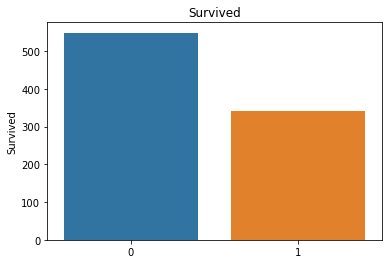

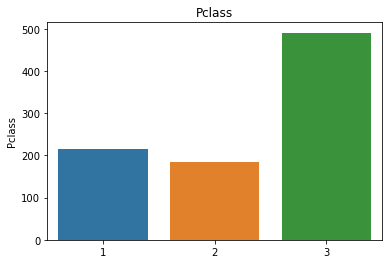

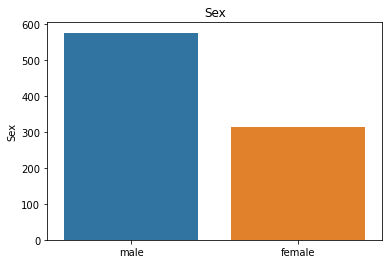

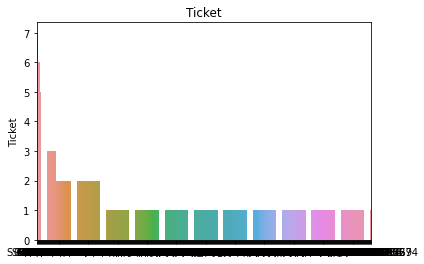

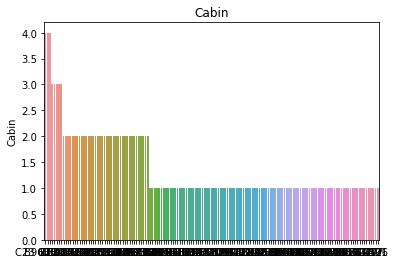

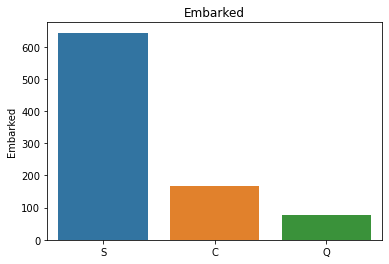

In [16]:
# Następnie przedstawiamy nasze dane typy "kategoria" w postaci wykresów jak w przypadku danych numerycznych
for i in dane_cat.columns:
    sns.barplot(dane_cat[i].value_counts().index, dane_cat[i].value_counts()).set_title(i)
    plt.show()

In [19]:
# Następnie robimy krok podobny jak w przypadku danych numerycznych gdzie sprawdzamy 
# jaki wpływ na przetrwanie miały poszczególne parametry
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print('_'*30)
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print('_'*30)
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
______________________________
Sex       female  male
Survived              
0             81   468
1            233   109
______________________________
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Analizując wzystkie dane przedstawione powyżej możemy wyciągnąć wstępne wnioski których użyjemy w dalszej części rozwiązywania problemu.
#1) Osoby które zapłaciły więcej za rejs mają większą szanse przetrwania
#2) Jeżeli posiadasz dzieci masz niec większe szanse przetrwania
#3) Posiadanie rodzeństwa zmniejsza szanse przetrwania
#4) Osoby podróżujące w I klasie mają większą szanse przetrwania
#5) Kobiety mają większą szanse przetrwania
#6) Osoby będące z lokalizacji S (Southampton) mają mniejsze szanse przetrwania

Kolejnym elementem wartym uwagi mogą być poszczególne tytuły osób znajdujących się na statku.

Dane te zapisane są w postaci (Nazwisko, tytuł. Imie)

In [20]:
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [21]:
training['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Ms                1
Capt              1
Mme               1
Don               1
Lady              1
Jonkheer          1
the Countess      1
Sir               1
Name: name_title, dtype: int64

In [23]:
# w tej części sprawdzimy ile osob miało przyporządkowane więcej niż 1 kabine
dane_cat.Cabin
training['cabin_multiple'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
training['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [24]:
# porównujemy zebrane dane z danymi o przetrwaniu
pd.pivot_table(training, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


Możemy zauważyć że osoby które nie miały przyporządkowanej żadnej kabiny mają dużo mniejsze szanse przetrwania. 

Z numeru kabiny można wnioskować że znajdują się one na tym samym piętrze lub są w tej samej części statku. Sprawdźmy więc czy miejsce w którym znajdowały się osoby ma wpływ na szanse ich przetrwania

In [25]:
training['cabin_adv'] = training.Cabin.apply(lambda x: str(x)[0])
pd.pivot_table(training,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


Jak widać powyżej, praktycznie wszystkie litery poza poziomem A mają większe szanse przetrwania. W przypadku braku danych (n) znacznie więcej ludzi nie przetrwało.

Warto również przeanalizować dane zawarte w numerze biletów. W pierwszej kolejności sprawdzimy czy bilet zawiera same liczby czy mieszane znaki:

In [22]:
training['numeric_ticket'] = training.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
training['numeric_ticket'].value_counts()

1    661
0    230
Name: numeric_ticket, dtype: int64

In [26]:
pd.pivot_table(training,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


Jak widać powyżej, rozkład osób które przetrwały jest mniej więcej równomierny, co może wskazywać na to że ta zależność nie miała dużego wpływu na szanse przetrwania. 

Po przygotowaniu danych przystępujemy do włączenia ich do naszego modelu.

W procesie modelowania będziemy wykorzystywali jedynie dane które zostały przez nas przygotowane i w razie potrzeby znormalizowane. Wykorzystamy tylko te dane które według mnie mogą mieć znaczący wpływ na wynik modelu. 

Wykorzystamy takie dane jak: Pclass, Sex, Age, SibSP, Parch, Fare, Embarked, cabin_adv, cabin_multiple, numeric_ticet, name_title

W przypadku niektórych danych wykorzystamy tylko średnią lub mediane 

(889,)

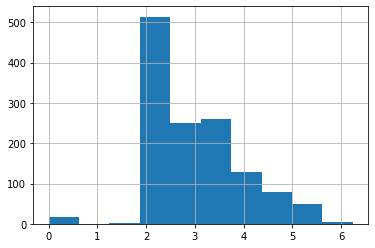

In [29]:
all_data['cabin_multiple'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data.Cabin.apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#Uzupełnianie pustych danych średnią lub medianą 
#all_data.Age = all_data.Age.fillna(training.Age.mean())
all_data.Age = all_data.Age.fillna(training.Age.median())
#all_data.Fare = all_data.Fare.fillna(training.Fare.mean())
all_data.Fare = all_data.Fare.fillna(training.Fare.median())

# Pomiń wartości NULL w 'embarked'
all_data.dropna(subset=['Embarked'],inplace = True)

# Dodanie skali logarytmicznej przy normalizacji danych
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()

# Konwersja danych w kategorii Pclass
all_data.Pclass = all_data.Pclass.astype(str)

# Tworzenie zmiennej pomocniczej do utworzenia danych w modelu
all_dummies = pd.get_dummies(all_data[['Pclass','Sex','Age','SibSp','Parch','norm_fare','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title','train_test']])

# Podział na dane treningowe i testowe
X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)


y_train = all_data[all_data.train_test==1].Survived
y_train.shape

Po utworzeniu zestawów danych możemy przystąpić do uczenia naszego modelu i stworzenia przewidywań.
Będziemy wykorzystywali różnego rodzaju modele w celu sprawdzenia który radzi sobie najlepiej z przewidywaniami.



In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [41]:
# Native Bayes
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.66853933 0.70224719 0.75842697 0.74719101 0.73446328]
0.7221735542436362


In [43]:
# LogisticRegression
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [44]:
#DecissionTree
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75842697 0.74719101 0.8258427  0.74719101 0.8079096 ]
0.7773122579826065


In [45]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())


[0.76966292 0.79775281 0.80898876 0.82022472 0.85310734]
0.8099473116231829


In [46]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())


[0.80898876 0.79213483 0.84831461 0.73595506 0.82485876]
0.8020504030978227


In [37]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cv)
print(cv.mean())

[0.85393258 0.82022472 0.8258427  0.80337079 0.86440678]
0.8335555132355742


Procentowa poprawność przewidywań dla poszczególnych modeli została przedstawiona poniżej:    

    Naive Bayes	              72.2%	
    Logistic Regression	      82.2%
    Decision Tree	            77.7%
    K Nearest Neighbor	       80.9%
    Random Forest	            80.2%
    Support Vector Classifier	83.3%
    
Najbardziej obiecujące są modele Logistic Regression oraz Support Vector Classifier.

Spróbujmy poprawić ich przewidywania dostrajając model

In [48]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [50]:
# Prosta funkcja pokazująca uzyskane parametry modelu
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [51]:
lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.6s


Logistic Regression
Best Score: 0.8279375357074843
Best Parameters: {'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    3.1s finished


In [53]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed:  4.0min finished


SVC
Best Score: 0.8335555132355742
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


Po wykonaniu strojenia dla naszych modeli otrzymaliśy poprawione wyniki które zostały zebrane w tabeli:


    Logistic Regression	      82.2%	82.7%
    Support Vector Classifier	83.3%	83.3%

Jak widać strojenie nie poprawiło znacznie jakości przewidywań. 

Aby zwiększyć poprawność działania naszego algorytmu wykorzystamy jeszcze metodę łączenia modeli funkcją VotingClassifier

In [57]:
from sklearn.ensemble import VotingClassifier
best_lr = best_clf_lr.best_estimator_
best_svc = best_clf_svc.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('lr',best_lr),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('lr',best_lr),('svc',best_svc)], voting = 'soft') 

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())


voting_clf_hard : [0.78651685 0.81460674 0.80337079 0.80898876 0.84180791]
voting_clf_hard mean : 0.8110582111343871
voting_clf_soft : [0.82022472 0.8258427  0.80337079 0.80898876 0.85875706]
voting_clf_soft mean : 0.8245604011934236


Pomimo tego że wartość średnia estymatora jest niższa w przypadku funkcji VotingClassifier to ostatecznie może okazać się że te przewidywania będą bardziej skutecznę w przypadku szerszego zestawu danych, ponieważ wykorzystujemy tutaj połączone siły obu metod Logistic Regression oraz Support Vector Classifier. 

W przypadku naszych funkcji lepsze przewidywania generuje wersja soft. 

In [60]:
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)


best_svc.fit(X_train_scaled, y_train)
y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)

In [70]:
#convert output to dataframe 

final_data_1 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_hard}
submission_1 = pd.DataFrame(data=final_data_2)

final_data_2 = {'PassengerId': test.PassengerId, 'Survived': y_hat_vc_soft}
submission_2 = pd.DataFrame(data=final_data_3)

final_data_comp = {'PassengerId': test.PassengerId, 'Survived_vc_hard': y_hat_vc_hard,'Survived_vc_soft' : y_hat_vc_soft}
comparison = pd.DataFrame(data=final_data_comp)

In [71]:
# sprawdzanie różnic pomiędzy przewidywaniami
comparison['difference_soft_hard'] = comparison.apply(lambda x: 1 if x.Survived_vc_hard != x.Survived_vc_soft else 0, axis =1)
comparison.difference_soft_hard.value_counts()

0    415
1      3
Name: difference_soft_hard, dtype: int64

In [72]:
#prepare submission files 
submission_1.to_csv('submission_vc_hard.csv',index=False)
submission_2.to_csv('submission_vc_soft.csv', index=False)

Po wysłaniu plików w zakładce submit prediction otrzymałem wyniki dla wersji:

submissio_vc_hard = 0.77511

submissio_vc_soft = 0.77751